<a href="https://colab.research.google.com/github/DivyaDeswal/Deep-Learning/blob/main/Simple_rnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [6]:
df=pd.read_csv('/content/sample_data/train.csv')

In [8]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [9]:
df.shape

(7613, 5)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [11]:
# drop unnecessary columns

In [12]:
df.drop(['keyword','location'],axis=1,inplace=True)

In [13]:
df.head(2)

,id,text,target
0,1,Our Deeds are the Reason of this #earthquake M...,1
1,4,Forest fire near La Ronge Sask. Canada,1


In [14]:
df[df['target']==0]       # target -this denotes whether a tweet is about a real disaster (1) or not (0)

,id,text,target
15,23,What's up man?,0
16,24,I love fruits,0
17,25,Summer is lovely,0
18,26,My car is so fast,0
19,28,What a goooooooaaaaaal!!!!!!,0
...,...,...,...
7581,10833,@engineshed Great atmosphere at the British Li...,0
7582,10834,Cramer: Iger's 3 words that wrecked Disney's s...,0
7584,10837,These boxes are ready to explode! Exploding Ki...,0
7587,10841,Sirens everywhere!,0


In [15]:
df['target'].value_counts()

,count
target,
0,4342
1,3271


# Data preprocessing

In [16]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences


In [17]:
from keras.models import Sequential
from keras.layers import Embedding ,LSTM,Dense,SpatialDropout1D
from keras.optimizers import Adam

In [23]:
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [22]:
import nltk
nltk.download('stopwords')
stopwords=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [24]:
def clean_text(text):
    # Remove hashtags, URLs, mentions, and special characters
    text = re.sub(r'#\S+', '', text)  # Remove hashtags
    text = re.sub(r'http\S+|www\S+', '', text)  # Remove URLs
    text = re.sub(r'@\S+', '', text)  # Remove mentions
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)  # Remove special characters
    text = text.strip()  # Remove leading/trailing spaces
    return text

In [25]:
df['text']=df['text'].apply(clean_text)

In [26]:
df['text']

,text
0,Our Deeds are the Reason of this May ALLAH Fo...
1,Forest fire near La Ronge Sask Canada
2,All residents asked to shelter in place are be...
3,13000 people receive evacuation orders in Cal...
4,Just got sent this photo from Ruby as smoke f...
...,...
7608,Two giant cranes holding a bridge collapse int...
7609,The out of control wild fires in California ev...
7610,M194 0104 UTC5km S of Volcano Hawaii
7611,Police investigating after an ebike collided w...


In [27]:
# tokenize and remove stopwords

In [28]:
def remove_stopwords(text):
    text=text.split()
    clean_text=[word for word in text if word not in stopwords]
    cleaned_text=' '.join(clean_text)
    return cleaned_text

In [29]:
df['text']=df['text'].apply(remove_stopwords)

In [30]:
df['text']

,text
0,Our Deeds Reason May ALLAH Forgive us
1,Forest fire near La Ronge Sask Canada
2,All residents asked shelter place notified off...
3,13000 people receive evacuation orders California
4,Just got sent photo Ruby smoke pours school
...,...
7608,Two giant cranes holding bridge collapse nearb...
7609,The control wild fires California even Norther...
7610,M194 0104 UTC5km S Volcano Hawaii
7611,Police investigating ebike collided car Little...


In [31]:
len(df['text'][2])

95

In [32]:
max_len=df['text'].apply(len).max()
max_len

139

In [33]:
df.head(2)

,id,text,target
0,1,Our Deeds Reason May ALLAH Forgive us,1
1,4,Forest fire near La Ronge Sask Canada,1


# tokenizer

In [34]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer=Tokenizer(num_words=1000)
tokenizer.fit_on_texts(df['text'])

# convert text into sequence of integers

sequences = tokenizer.texts_to_sequences(df['text'])

# Pad sequences to ensure uniform length (max length = 150)
max_length = 150
X = pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')

# Display the padded sequences
print(X)

[[589 759  67 ...   0   0   0]
 [125   7 154 ...   0   0   0]
 [112 590 103 ...   0   0   0]
 ...
 [201 561   0 ...   0   0   0]
 [ 20 258  64 ...   0   0   0]
 [  2 139  85 ...   0   0   0]]


In [35]:
# train test split

In [36]:
X_train,X_test,y_train,y_test=train_test_split(X,df['target'],test_size=0.2,random_state=42)

In [37]:
X_train.shape

(6090, 150)

In [38]:
X_test.shape

(1523, 150)

In [39]:
y_train.shape

(6090,)

# RNN model

In [44]:
from keras.layers import Embedding ,LSTM,Dense,SpatialDropout1D, SimpleRNN, Dropout # Import SimpleRNN

# Define the RNN model
# Define the RNN model
model = Sequential()

# Embedding layer: transforms input sequences into dense vectors of fixed size
model.add(Embedding(input_dim=1000, output_dim=128, input_length=150))

# RNN layer
model.add(SimpleRNN(128, activation='tanh', return_sequences=False))

# Dropout layer to prevent overfitting
model.add(Dropout(0.5))

# Output layer: sigmoid for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model (important step)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [45]:
# Build the model manually if needed
model.build(input_shape=(None, max_length))  # Specify input shape here

# Show the summary
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ (None, 150, 128)       │       128,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 161,025 (629.00 KB)

 Trainable params: 161,025 (629.00 KB)

 Non-trainable params: 0 (0.00 B)

In [46]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 17s 74ms/step - accuracy: 0.5367 - loss: 0.7002 - val_accuracy: 0.5338 - val_loss: 0.6943
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 20s 75ms/step - accuracy: 0.5178 - loss: 0.7220 - val_accuracy: 0.5785 - val_loss: 0.6810
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 20s 74ms/step - accuracy: 0.5327 - loss: 0.7084 - val_accuracy: 0.5739 - val_loss: 0.6833
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 14s 74ms/step - accuracy: 0.5701 - loss: 0.6867 - val_accuracy: 0.5739 - val_loss: 0.6837
Epoch 5/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 14s 72ms/step - accuracy: 0.5488 - loss: 0.6962 - val_accuracy: 0.5627 - val_loss: 0.6883
Epoch 6/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 13s 70ms/step - accuracy: 0.5112 - loss: 0.7151 - val_accuracy: 0.5739 - val_loss: 0.6813
Epoch 7/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 21s 73ms/step - accuracy: 0.5284 - loss: 0.7006 - val_accuracy: 0.5739 - val_loss: 0.6811
Epoch 8/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 20s 71ms/step - accuracy: 0.5431 - loss: 0.6952 - 

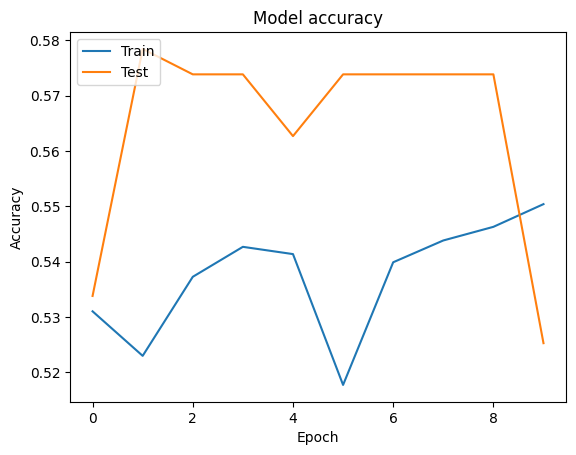

In [47]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [48]:
loss, accuracy = model.evaluate(X_test, y_test)

print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")


48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5457 - loss: 0.6886
Test Loss: 0.6947551369667053
Test Accuracy: 0.5252790451049805


# make prediction on new data

In [49]:

new_data = ["This is a new sentence for classification."]
new_sequences = tokenizer.texts_to_sequences(new_data)
new_padded = pad_sequences(new_sequences, maxlen=max_length, padding='post', truncating='post')

# Predict probability for class 1
prediction = model.predict(new_padded)

# Convert probability to class (0 or 1)
predicted_class = (prediction > 0.5).astype("int32")

print(f"Predicted Class: {predicted_class[0][0]}")  # 0 or 1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step
Predicted Class: 1


#  Save the model to a file

In [50]:

model.save('text_classification_model.h5')

In [51]:
import pickle
from tensorflow.keras.preprocessing.text import Tokenizer

# Save the Tokenizer using pickle
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

padding_config = {
    'maxlen': max_length,
    'padding': 'post',
    'truncating': 'post'
}

with open('padding_config.pickle', 'wb') as handle:
    pickle.dump(padding_config, handle, protocol=pickle.HIGHEST_PROTOCOL)


# predict on new data

In [52]:
from tensorflow.keras.models import load_model

model = load_model('text_classification_model.h5')


In [53]:
import pickle
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load the tokenizer
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

# Load padding configuration
with open('padding_config.pickle', 'rb') as handle:
    padding_config = pickle.load(handle)



In [54]:
new_data = ["This is a new sentence for classification."]

# Tokenize the input text using the loaded tokenizer
new_sequences = tokenizer.texts_to_sequences(new_data)

# pad sequence
new_padded = pad_sequences(new_sequences, maxlen=padding_config['maxlen'],
                            padding=padding_config['padding'], truncating=padding_config['truncating'])

# Predict the probability
prediction = model.predict(new_padded)

# Convert the probability
predicted_class = (prediction > 0.5).astype("int32")

print(f"Predicted Class: {predicted_class[0][0]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
Predicted Class: 1
